# Time series prediction using an RNN with TensorFlow

## 1. Import & Preprocessing

### a) Importing modules

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


from tensorflow import keras

### b) Importing data

In [ ]:
flight_data = sns.load_dataset("flights")
flight_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flight_data.shape

(144, 3)

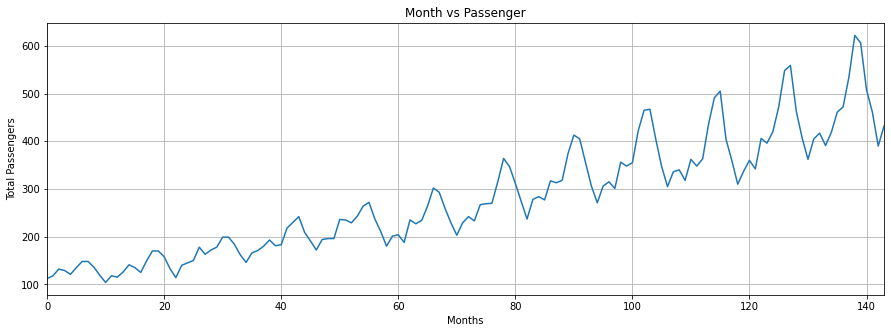

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(flight_data['passengers'])

In [ ]:
flight_data['passengers'][11]

118

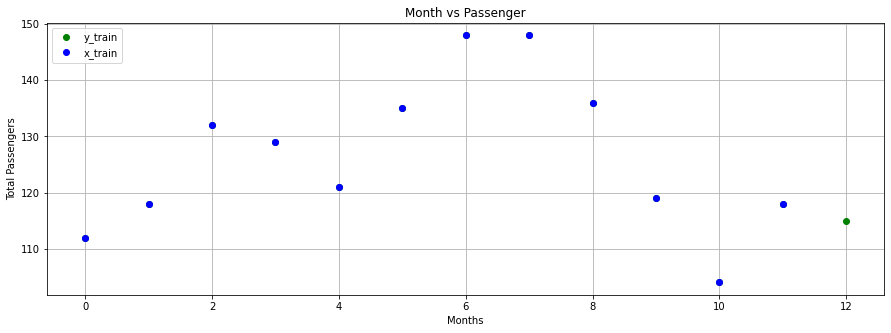

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.plot(flight_data['passengers'][:13],linestyle="",marker="o", color='green')
plt.plot(np.arange(0, 12, 1), flight_data['passengers'][:12],linestyle="",marker="o", color='blue')
plt.autoscale(axis='x',tight=False)
plt.legend(['y_train', 'x_train'], loc='upper left')
plt.show()

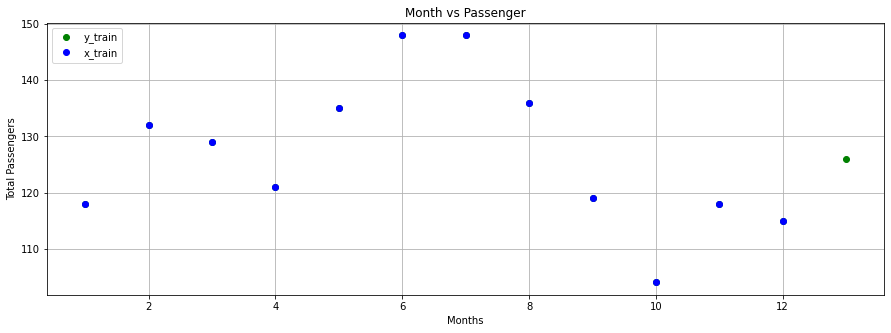

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.plot(flight_data['passengers'][1:14],linestyle="",marker="o", color='green')
plt.plot(np.arange(1, 13, 1), flight_data['passengers'][1:13],linestyle="",marker="o", color='blue')
plt.autoscale(axis='x',tight=False)
plt.legend(['y_train', 'x_train'], loc='upper left')
plt.show()

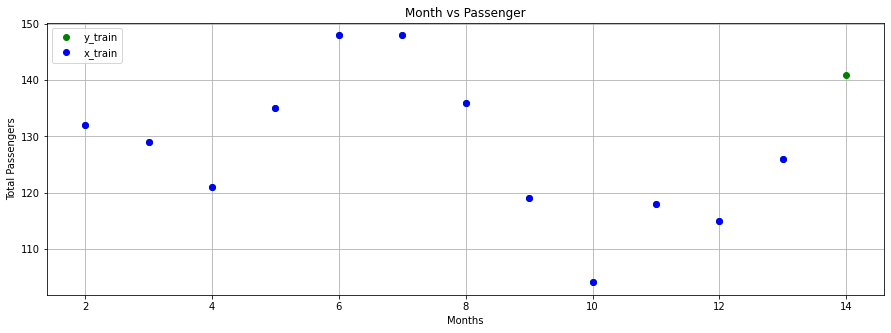

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.plot(flight_data['passengers'][2:15],linestyle="",marker="o", color='green')
plt.plot(np.arange(2, 14, 1), flight_data['passengers'][2:14],linestyle="",marker="o", color='blue')
plt.autoscale(axis='x',tight=False)
plt.legend(['y_train', 'x_train'], loc='upper left')
plt.show()

In [ ]:
data = flight_data['passengers']

In [ ]:
test_size = 12

x_train = data[:-test_size].values.astype(np.float32)
x_test = data[-test_size:].values.astype(np.float32)

In [ ]:
x_train.shape

(132,)

In [ ]:
x_test.shape

(12,)

### c) Data preparation

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train = scaler.fit_transform(x_train.reshape(-1, 1))

In [ ]:
x_train.shape

(132, 1)

## 2. Model specific data preparation

### a) Load the data

In [ ]:
x_train_tf = tf.squeeze(tf.convert_to_tensor(x_train))

In [ ]:
x_train_tf.shape

TensorShape([132])

In [ ]:
def create_sequences(input_data, window=12):
    seq = []
    L = len(input_data)
    for i in range(L-window):
        train_seq = input_data[i:i+window]
        train_label = input_data[i+window:i+window+1]
        seq.append((train_seq, train_label))
    return seq

In [ ]:
train_seq_tf = create_sequences(x_train_tf)

In [ ]:
len(train_seq_tf)

120

### b) Tensor view of the data

In [ ]:
train_seq_tf[0]

(<tf.Tensor: shape=(12,), dtype=float32, numpy=
 array([-0.9648351 , -0.9384615 , -0.876923  , -0.89010984, -0.92527467,
        -0.8637362 , -0.80659336, -0.80659336, -0.8593406 , -0.9340659 ,
        -0.99999994, -0.9384615 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.9516483], dtype=float32)>)

## 3. Model definition

### a) Build the model

In [ ]:
initializer_uniform = tf.random_uniform_initializer(
    minval=-1, maxval=1, seed=123)
initializer_recurrent = tf.initializers.Orthogonal(seed=123)
initializer_zeros = tf.zeros_initializer()

In [ ]:
model_tf = keras.Sequential([
    keras.layers.LSTM(100, input_shape=(12,1), kernel_initializer = initializer_uniform, recurrent_initializer = initializer_recurrent),
    keras.layers.Dense(1, kernel_initializer = initializer_uniform)
])

### b) Inspect the model

In [ ]:
model_tf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### c) Inspect the first LSTM layer

In [ ]:
hidden1_tf_ante = model_tf.layers[0]
weights_tf_ante = hidden1_tf_ante.get_weights()
weights_tf_ante[0]

array([[-0.04798412, -0.22223973, -0.9824271 , -0.57410717, -0.79084826,
        -0.6723347 , -0.54534245, -0.14903617,  0.22151732, -0.04990911,
         0.76847243,  0.8567488 , -0.19580126,  0.6683371 , -0.29299927,
        -0.13567281,  0.43682718, -0.5372863 , -0.8050833 ,  0.33245063,
         0.08226037,  0.9955554 ,  0.42286134,  0.5824466 , -0.88201547,
         0.79022574, -0.96988153,  0.8838699 ,  0.7405057 , -0.26739526,
         0.541693  , -0.33356333, -0.5114386 ,  0.28969407, -0.5687852 ,
        -0.9064033 ,  0.55588317,  0.12526917,  0.76767826,  0.9882431 ,
         0.82163215, -0.83939624, -0.1760552 , -0.8733709 ,  0.54416513,
         0.3740089 ,  0.67598724,  0.7747915 , -0.22487664, -0.7704594 ,
         0.11647105,  0.735404  , -0.8178191 ,  0.80086374, -0.596689  ,
         0.43223333,  0.6735773 ,  0.28332973, -0.15904045,  0.38079   ,
        -0.8442614 ,  0.4907596 , -0.25315404,  0.02004218, -0.3033669 ,
        -0.2716992 , -0.11689925, -0.78340054, -0.3

In [ ]:
weights_tf_ante[0].shape

(1, 400)

In [ ]:
hidden1_tf_ante = model_tf.layers[0]
weights_tf_ante = hidden1_tf_ante.get_weights()
weights_tf_ante[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
weights_tf_ante[2].shape

(400,)

## 4. Loss & Optimizer

In [ ]:
optimizer_tf = tf.keras.optimizers.Adam()
loss_fn_tf = tf.keras.losses.MeanSquaredError()

## 5. Training

### a) Training loop

In [ ]:
def train_step_tf(model, optimizer, loss_fn, sequence):
  losses = []
  for seq, label in sequence:
    exp_sequence = tf.expand_dims(seq,axis=0)
    exp_sequence = tf.expand_dims(exp_sequence,axis=2)

    with tf.GradientTape() as tape:
      y_pred_tf = model(exp_sequence, training=True)
      loss = loss_fn(label, y_pred_tf)

    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    losses.append(loss)
  return losses

In [ ]:
train_loss_tf = []

epochs = 25
for epoch in range(epochs):
  loss = train_step_tf(model_tf, optimizer_tf, loss_fn_tf, train_seq_tf)
  mean_loss_tf = float(tf.reduce_mean(loss))
  train_loss_tf.append(mean_loss_tf)

  template = ("Epoch {}, Loss: {}")
  print(template.format(epoch+1, mean_loss_tf))

Epoch 1, Loss: 0.1808231770992279
Epoch 2, Loss: 0.15266580879688263
Epoch 3, Loss: 0.23133452236652374
Epoch 4, Loss: 0.1412290632724762
Epoch 5, Loss: 0.06961475312709808
Epoch 6, Loss: 0.027259277179837227
Epoch 7, Loss: 0.057381339371204376
Epoch 8, Loss: 0.03478182107210159
Epoch 9, Loss: 0.03180001303553581
Epoch 10, Loss: 0.027966530993580818
Epoch 11, Loss: 0.025167936459183693
Epoch 12, Loss: 0.02294635958969593
Epoch 13, Loss: 0.021120760589838028
Epoch 14, Loss: 0.01960045099258423
Epoch 15, Loss: 0.01836143620312214
Epoch 16, Loss: 0.017418431118130684
Epoch 17, Loss: 0.016806412488222122
Epoch 18, Loss: 0.016565866768360138
Epoch 19, Loss: 0.016729645431041718
Epoch 20, Loss: 0.017333654686808586
Epoch 21, Loss: 0.018349111080169678
Epoch 22, Loss: 0.019864102825522423
Epoch 23, Loss: 0.022568486630916595
Epoch 24, Loss: 0.022776518017053604
Epoch 25, Loss: 0.017148731276392937


### b) Training progress

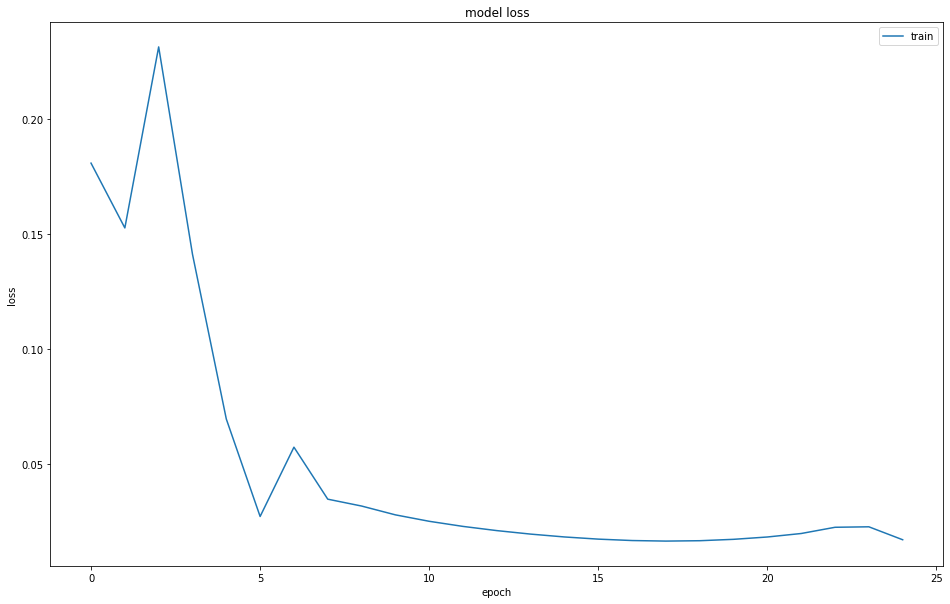

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(train_loss_tf)
#plt.plot(test_loss_tf)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

### c) Inspect the first hidden layer after training

In [ ]:
hidden1_tf_post = model_tf.layers[0]
weights_tf_post = hidden1_tf_post.get_weights()
weights_tf_post[0]

array([[-3.62456627e-02, -2.23993868e-01, -9.71433699e-01,
        -5.77910483e-01, -7.95549929e-01, -6.89023495e-01,
        -5.53154826e-01, -1.39552057e-01,  1.86794311e-01,
        -5.54367565e-02,  7.56209671e-01,  8.55449200e-01,
        -2.31790185e-01,  6.77162170e-01, -2.92882532e-01,
        -1.29303649e-01,  4.28924769e-01, -5.46602488e-01,
        -8.39657247e-01,  3.20280880e-01,  7.86438137e-02,
         9.99264181e-01,  4.28513139e-01,  5.70667684e-01,
        -8.72959435e-01,  7.84290135e-01, -9.80451107e-01,
         8.97911310e-01,  7.36959398e-01, -3.08688819e-01,
         5.48275113e-01, -3.28363121e-01, -4.85808671e-01,
         2.62355745e-01, -5.94736040e-01, -8.74809444e-01,
         5.62037528e-01,  1.09330043e-01,  7.56556571e-01,
         9.72751915e-01,  8.47774386e-01, -8.62661064e-01,
        -1.77567199e-01, -8.71642709e-01,  5.46393037e-01,
         3.98778588e-01,  6.56908572e-01,  7.71380126e-01,
        -2.34816596e-01, -7.67816722e-01,  9.61355567e-0

In [ ]:
hidden1_tf_post = model_tf.layers[0]
weights_tf_post = hidden1_tf_post.get_weights()
weights_tf_post[2]

array([-8.11935440e-02, -2.39604861e-02, -5.63252084e-02, -4.80937771e-02,
       -1.21379597e-02, -5.55003919e-02, -3.37822437e-02, -9.15565938e-02,
       -9.39444080e-02, -7.76256099e-02, -4.22371365e-02, -1.47390272e-02,
       -9.09111053e-02, -2.94527728e-02, -7.83779547e-02, -7.91684613e-02,
       -3.88097018e-02, -6.33950159e-02, -3.95406708e-02, -5.12653477e-02,
       -4.38191704e-02, -3.00520733e-02, -3.52119617e-02, -1.50691355e-02,
       -6.06276430e-02, -3.47550400e-02, -8.76437640e-04, -4.72926050e-02,
       -2.81895809e-02,  4.24480513e-02, -5.78375757e-02, -2.51180604e-02,
       -3.80870961e-02, -4.49879952e-02, -6.08561561e-03, -4.40289862e-02,
       -2.83700302e-02, -6.88203946e-02, -9.35444012e-02, -1.19523797e-02,
       -4.65456881e-02, -4.24727313e-02, -3.53826880e-02, -6.67157546e-02,
       -5.78512549e-02, -4.36623506e-02, -4.67479452e-02, -1.33387130e-02,
       -7.08299130e-02, -2.90702842e-02, -4.15103063e-02, -4.21275832e-02,
       -3.77602428e-02, -

## 6. Evaluation

### a) Prediction comparing to the test set

In [ ]:
test_inputs_overlap_tf = x_train[-12:].tolist()

In [ ]:
test_inputs_overlap_tf

[[0.12527477741241455],
 [0.046153903007507324],
 [0.3274726867675781],
 [0.28351664543151855],
 [0.3890111446380615],
 [0.6175825595855713],
 [0.951648473739624],
 [1.000000238418579],
 [0.5780220031738281],
 [0.3318682909011841],
 [0.13406598567962646],
 [0.32307708263397217]]

In [ ]:
for i in range(12):
    x_test_seq_tf = tf.convert_to_tensor(test_inputs_overlap_tf[-12:])
    x_test_seq_tf = tf.expand_dims(x_test_seq_tf,axis=0)
    pred_tf = tf.constant(model_tf(x_test_seq_tf)).numpy()
    test_inputs_overlap_tf.append([pred_tf.item()])

In [ ]:
test_inputs_overlap_tf[-12:]

[[0.4988939166069031],
 [0.777797281742096],
 [1.1616885662078857],
 [1.4788464307785034],
 [1.6010549068450928],
 [1.5201128721237183],
 [1.3027777671813965],
 [0.9863969087600708],
 [0.6376135349273682],
 [0.4136888384819031],
 [0.3897881507873535],
 [0.5216307640075684]]

In [ ]:
overlap_predictions_tf = scaler.inverse_transform(np.array(test_inputs_overlap_tf[-12:]).reshape(-1, 1))
print(overlap_predictions_tf)

[[444.99833921]
 [508.44885184]
 [595.78411501]
 [667.93752586]
 [695.73995287]
 [677.32564083]
 [627.88190674]
 [555.90526479]
 [476.55705092]
 [425.61418484]
 [420.17677864]
 [450.17097175]]


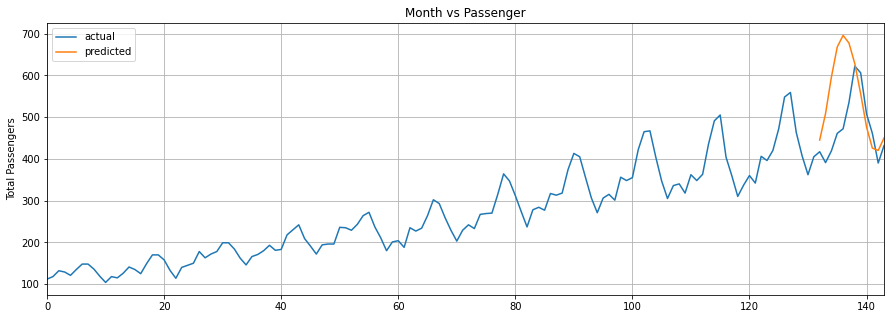

In [ ]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.plot(np.arange(132, 144, 1),overlap_predictions_tf)
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

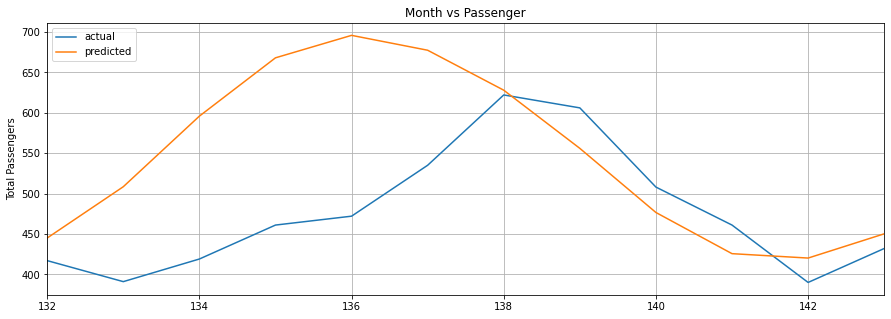

In [ ]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'][-12:])
plt.plot(np.arange(132, 144, 1),overlap_predictions_tf)
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

### b) Prediction into the future using the test set

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_test_tf = scaler.fit_transform(x_test.reshape(-1, 1))

In [ ]:
test_inputs_tf = x_test_tf[-12:].tolist()

In [ ]:
test_inputs_tf

[[-0.7672414779663086],
 [-0.9913794994354248],
 [-0.7500002384185791],
 [-0.38793110847473145],
 [-0.2931036949157715],
 [0.25],
 [1.0],
 [0.8620686531066895],
 [0.01724100112915039],
 [-0.38793110847473145],
 [-1.000000238418579],
 [-0.6379311084747314]]

In [ ]:
for i in range(12):
    x_test_seq_tf = tf.convert_to_tensor(test_inputs_tf[-12:])
    x_test_seq_tf = tf.expand_dims(x_test_seq_tf,axis=0)
    pred_tf = tf.constant(model_tf(x_test_seq_tf)).numpy()
    test_inputs_tf.append([pred_tf.item()])

In [ ]:
test_inputs_tf[-12:]

[[-0.4294840395450592],
 [-0.2220548838376999],
 [0.03045632876455784],
 [0.28542736172676086],
 [0.4794228672981262],
 [0.574531614780426],
 [0.5100300908088684],
 [0.23699910938739777],
 [-0.1290978193283081],
 [-0.299508273601532],
 [-0.2741796672344208],
 [-0.25586438179016113]]

In [ ]:
predictions_tf = scaler.inverse_transform(np.array(test_inputs_tf[-12:]).reshape(-1, 1))
print(predictions_tf)

[[456.17987219]
 [480.24165434]
 [509.53295511]
 [539.10959504]
 [561.61307377]
 [572.64568852]
 [565.16351171]
 [533.49191775]
 [491.02467386]
 [471.25706109]
 [474.19517944]
 [476.31975256]]


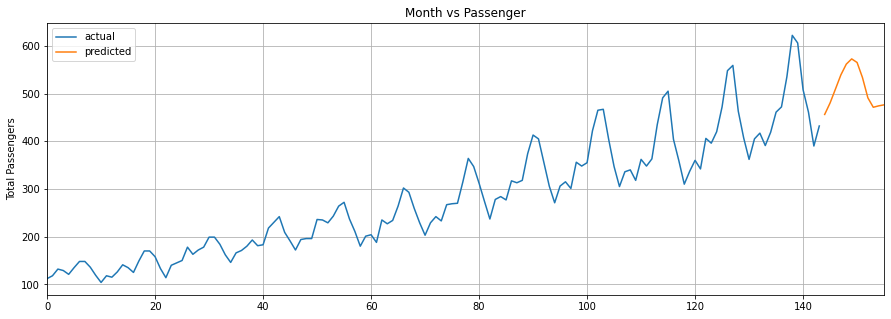

In [ ]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.plot(np.arange(144, 156, 1),predictions_tf)
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

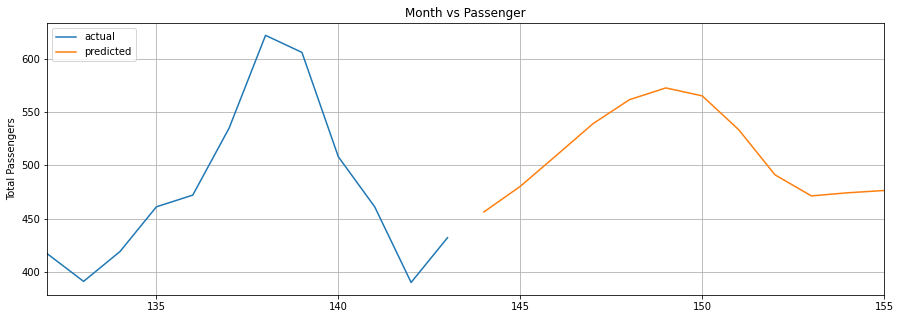

In [ ]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'][-12:])
plt.plot(np.arange(144, 156, 1),predictions_tf)
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

## Appendix

In [ ]:
class LSTM_TF(tf.keras.Model):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super(LSTM_TF, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = keras.layers.LSTM(hidden_layer_size, 
                                      input_shape=(12, input_size), 
                                      kernel_initializer = initializer_uniform,
                                      recurrent_initializer = initializer_recurrent,
                                      unit_forget_bias = False,
                                      bias_initializer = initializer_zeros,
                                      batch_size = 120,
                                      stateful=True)
        self.lstm.build((1,input_size))
        self.dense = keras.layers.Dense(output_size, 
                                        kernel_initializer=initializer_uniform, 
                                        bias_initializer=initializer_zeros)

    def call(self, inputs, training=False):
        self.init_hidden()
        sequence = tf.expand_dims(inputs,axis=0)
        sequence = tf.expand_dims(sequence,axis=2)
        lstm_out = self.lstm(sequence)
        output = self.dense(lstm_out)
        return output

    def init_hidden(self):
        h0 = np.zeros((1, self.hidden_layer_size))
        c0 = np.zeros((1, self.hidden_layer_size))
        self.lstm.reset_states(states=[h0,c0])

In [ ]:
model_tf = LSTM_TF()